# Part 1 - Import Libaries & Dataframe

In [50]:
#import libraries 
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy 
import sklearn 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [51]:
%matplotlib inline

In [52]:
#import citibikes pickle data

citi_04 = pd.read_pickle(r'C:/Users/mrtak/10-2023 City Bike Analysis/city_03.pkl')

In [53]:
citi_04.head()

,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,trip_duration_min
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,18.300000,18.583333,16.550000
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,18.633333,18.800000,9.683333
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,19.733333,19.833333,6.016667
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,11.900000,12.050000,9.350000
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,22.016667,22.133333,7.116667


In [54]:
#check the columns 
citi_04.columns.to_list()

['day_of_week',
 'start_hour',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'trip_duration',
 'subscriber',
 'birth_year',
 'gender',
 'start_of_ride',
 'end_of_ride',
 'trip_duration_min']

In [55]:
#check for duplicates 
df_dups = citi_04[citi_04.duplicated()] 
df_dups
#no duplicates 

,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,trip_duration_min


In [56]:
#check for missing values 
citi_04.isnull().sum()
#no missign values 

day_of_week                0
start_hour                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
start_of_ride              0
end_of_ride                0
trip_duration_min          0
dtype: int64

In [58]:
#check for mixed datatypes 
for col in citi_04.columns.tolist():
  weird = (citi_04[[col]].applymap(type) != citi_04[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (citi_04[weird]) > 0:
    print (col)
#no mixed data types 

In [59]:
#list column names 
citi_04.columns.to_list()

['day_of_week',
 'start_hour',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'trip_duration',
 'subscriber',
 'birth_year',
 'gender',
 'start_of_ride',
 'end_of_ride',
 'trip_duration_min']

In [68]:
# Create a subset which contains only the quantitative values

sub = citi_04[['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id','end_station_latitude','end_station_longitude','trip_duration','birth_year','start_of_ride','end_of_ride','trip_duration_min']]

# Part 2 - The Elbow Technique

In [69]:
#define a range of potential numbers of clusters in the data 
#choosing 1-10 like in the Exercise
num_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_clusters]

In [70]:
#after applying range, then apply k-means algorithm 
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))]
#this will output a list of scores 

C:\Users\mrtak\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mrtak\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mrtak\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mrtak\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mrtak\Anaconda3\Lib\site-packages\sklearn\clust

In [71]:
score

[-21545958558.540962,
 -13574187215.98019,
 -9667438403.48108,
 -6115102185.819847,
 -4293812042.4186487,
 -3560470515.1343107,
 -3200506630.57272,
 -2857405391.705841,
 -2654029889.243131]

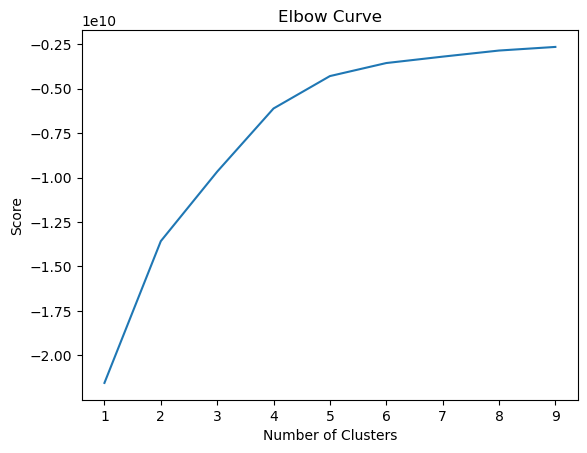

In [72]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

###  In this example, there's a large jump from three to fivee on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is five.

# Part 3 - k-means clustering

In [73]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 


In [75]:
# Fit the k-means object to the data.

kmeans.fit(sub)

C:\Users\mrtak\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [76]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\mrtak\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mrtak\AppData\Local\Temp\ipykernel_22616\3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [78]:
sub.head()

,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,start_of_ride,end_of_ride,trip_duration_min,clusters
0,523,40.754666,-73.991382,334,40.742388,-73.997262,993,1968.0,18.300000,18.583333,16.550000,3
1,257,40.719392,-74.002472,236,40.728419,-73.987140,581,1983.0,18.633333,18.800000,9.683333,4
2,479,40.760193,-73.991255,513,40.768254,-73.988639,361,1989.0,19.733333,19.833333,6.016667,4
3,527,40.743156,-73.974347,441,40.756014,-73.967416,561,1988.0,11.900000,12.050000,9.350000,4
4,293,40.730287,-73.990765,432,40.726218,-73.983799,427,1986.0,22.016667,22.133333,7.116667,4


In [79]:
sub['clusters'].value_counts()

4    24308
3    12241
0     3809
2     1332
1     1301
Name: clusters, dtype: int64

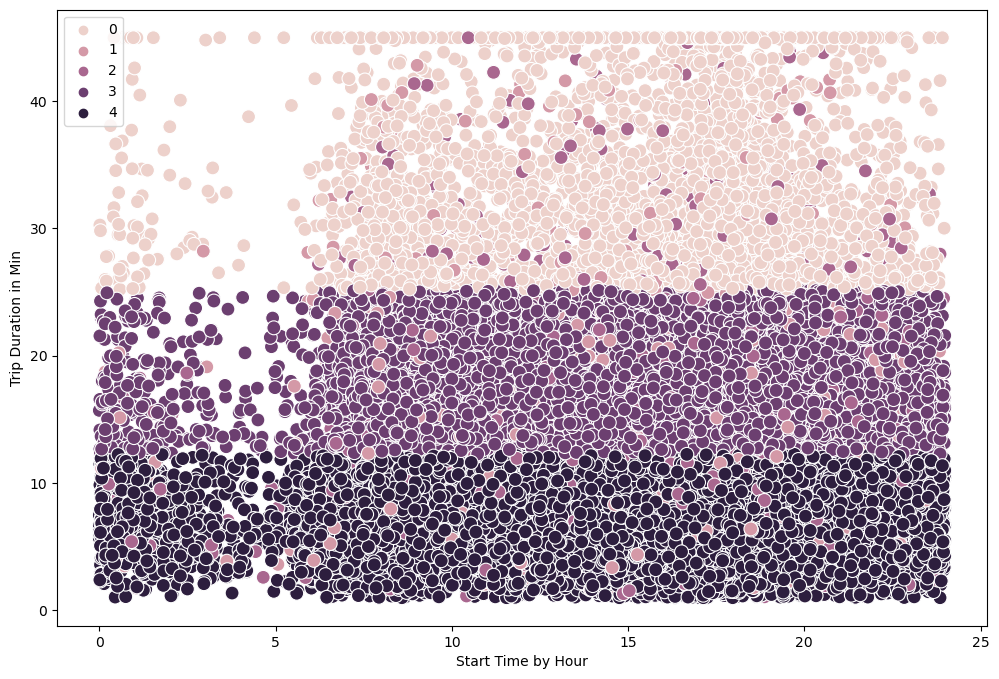

In [81]:
# Plot the clusters for the "start_of_ride" and "trip_duration_min" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['start_of_ride'], y=sub['trip_duration_min'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start Time by Hour') # Label x-axis.
plt.ylabel('Trip Duration in Min') # Label y-axis.
plt.show()

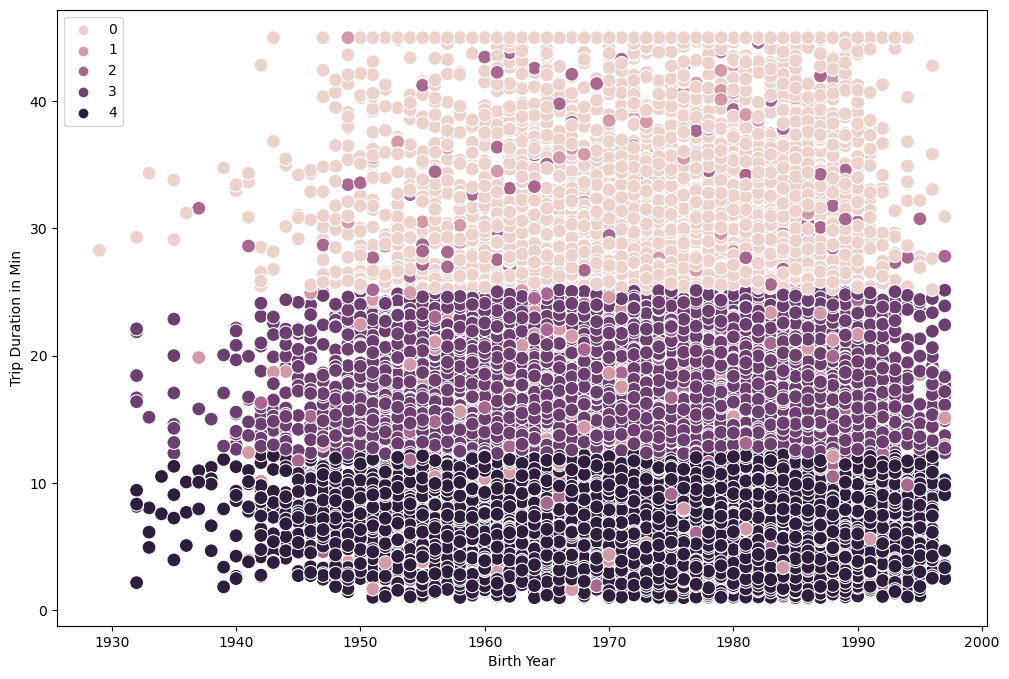

In [84]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['birth_year'], y=sub['trip_duration_min'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Birth Year') # Label x-axis.
plt.ylabel('Trip Duration in Min') # Label y-axis.
plt.show()

### The findings suggest that the dark purple cluster generally has the lowest duration in bike ride, while light purple have medium ride length. On the contrary, light clusters have longest ride length. As I noticed, there is higher volume of bike rides for people who are born in 70s and 80s. While elderly born below 1950 have lower ridership amount, it is more prevalent for working age population. Aso, bike rides are very prevalent between work outs between 8-5am while is is lower between 2am-6pm.

# Part 4 - Descriptive Statistics

In [86]:
sub.loc[sub['clusters'] == 4, 'cluster'] = 'dark'
sub.loc[sub['clusters'] == 3, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 2, 'cluster'] = 'medium'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'light'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\mrtak\AppData\Local\Temp\ipykernel_22616\3689048188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 4, 'cluster'] = 'dark'


In [87]:
sub.groupby('cluster').agg({'start_of_ride':['mean', 'median'], 
                         'birth_year':['mean', 'median']})

start_of_ride              birth_year        
                 mean     median         mean  median
cluster                                              
dark        14.411021  15.033333  1976.009914  1978.0
light       14.674174  15.500000  1975.508071  1978.0
medium      14.564214  15.200000  1975.605105  1978.0
pink        15.057780  16.216667  1974.485429  1977.0
purple      14.756248  15.700000  1975.411813  1978.0

## Conclusion

### Based on these statistics, it appears that the Medium Cluster is the most consistent overall, as it generally has the smallest differences between the mean and median values across all indicators. The Purple Cluster exhibits slightly larger differences, indicating slightly more variability within those clusters for some indicators. The Dark Cluster is the most diverse and inconsistent.

### In general, results of cluster analysis can be foundation of wide range of applications and decision making processes in various domains. 